In [23]:
import pandas as pd
#前処理したデータを読み込む
merge_data_df = pd.read_csv('csv\merge_data.csv')
#いらない列を削除
merge_data_df = merge_data_df.drop(['イベント日','アナスロ店舗名','都道府県'], axis=1)
merge_data_df 

,平均G数,平均差枚,総台数,一般並び(スロ),並び人数(スロ),土日
0,3078.712121,-51.888889,198,49.0,48.0,1
1,967.975806,54.189516,248,27.0,12.0,1
2,3782.413953,-64.260465,215,25.0,169.0,1
3,3580.919431,108.886256,211,23.0,198.0,1
4,3670.671717,-257.040404,198,54.0,39.0,0
...,...,...,...,...,...,...
1513,2792.878713,-27.792079,404,38.0,159.0,0
1514,4236.388278,-221.978022,546,65.0,229.0,0
1515,2166.075000,94.937500,160,50.0,10.0,0
1516,894.482456,49.175439,114,40.0,64.0,0


In [19]:
#重回帰分析用にデータを整形する
#標準化
from sklearn.preprocessing import StandardScaler
#データを標準化する
scaler = StandardScaler()
scaler.fit(merge_data_df)
#標準化したデータを変数に格納する
merge_data_std = scaler.transform(merge_data_df)
#標準化したデータをデータフレームに変換する
merge_data_std_df = pd.DataFrame(merge_data_std, columns=merge_data_df.columns)
merge_data_std_df

,平均G数,平均差枚,総台数,一般並び(スロ),並び人数(スロ),土日
0,-0.428052,-0.146098,-0.814961,-0.098205,-0.607028,1.009266
1,-2.161614,0.506162,-0.467399,-0.597463,-0.834797,1.009266
2,0.149903,-0.222169,-0.696790,-0.642850,0.158528,1.009266
3,-0.015586,0.842483,-0.724595,-0.688237,0.342009,1.009266
4,0.058128,-1.407542,-0.814961,0.015262,-0.663970,-0.990819
...,...,...,...,...,...,...
1513,-0.662809,0.002070,0.616993,-0.347834,0.095259,-0.990819
1514,0.522755,-1.191949,1.604068,0.264891,0.538143,-0.990819
1515,-1.177607,0.756714,-1.079108,-0.075512,-0.847451,-0.990819
1516,-2.221974,0.475331,-1.398865,-0.302447,-0.505798,-0.990819


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
 
# 高解像度ディスプレイ用
from IPython.display import set_matplotlib_formats
# from matplotlib_inline.backend_inline import set_matplotlib_formats # バージョンによってはこちらを有効に
set_matplotlib_formats('retina')

C:\Users\tsc95\AppData\Local\Temp\ipykernel_35724\1785493046.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


c:\Users\tsc95\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tsc95\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tsc95\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tsc95\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tsc95\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 26522 (\N{CJK UNIFIED IDEOGRAPH-679A}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tsc95\

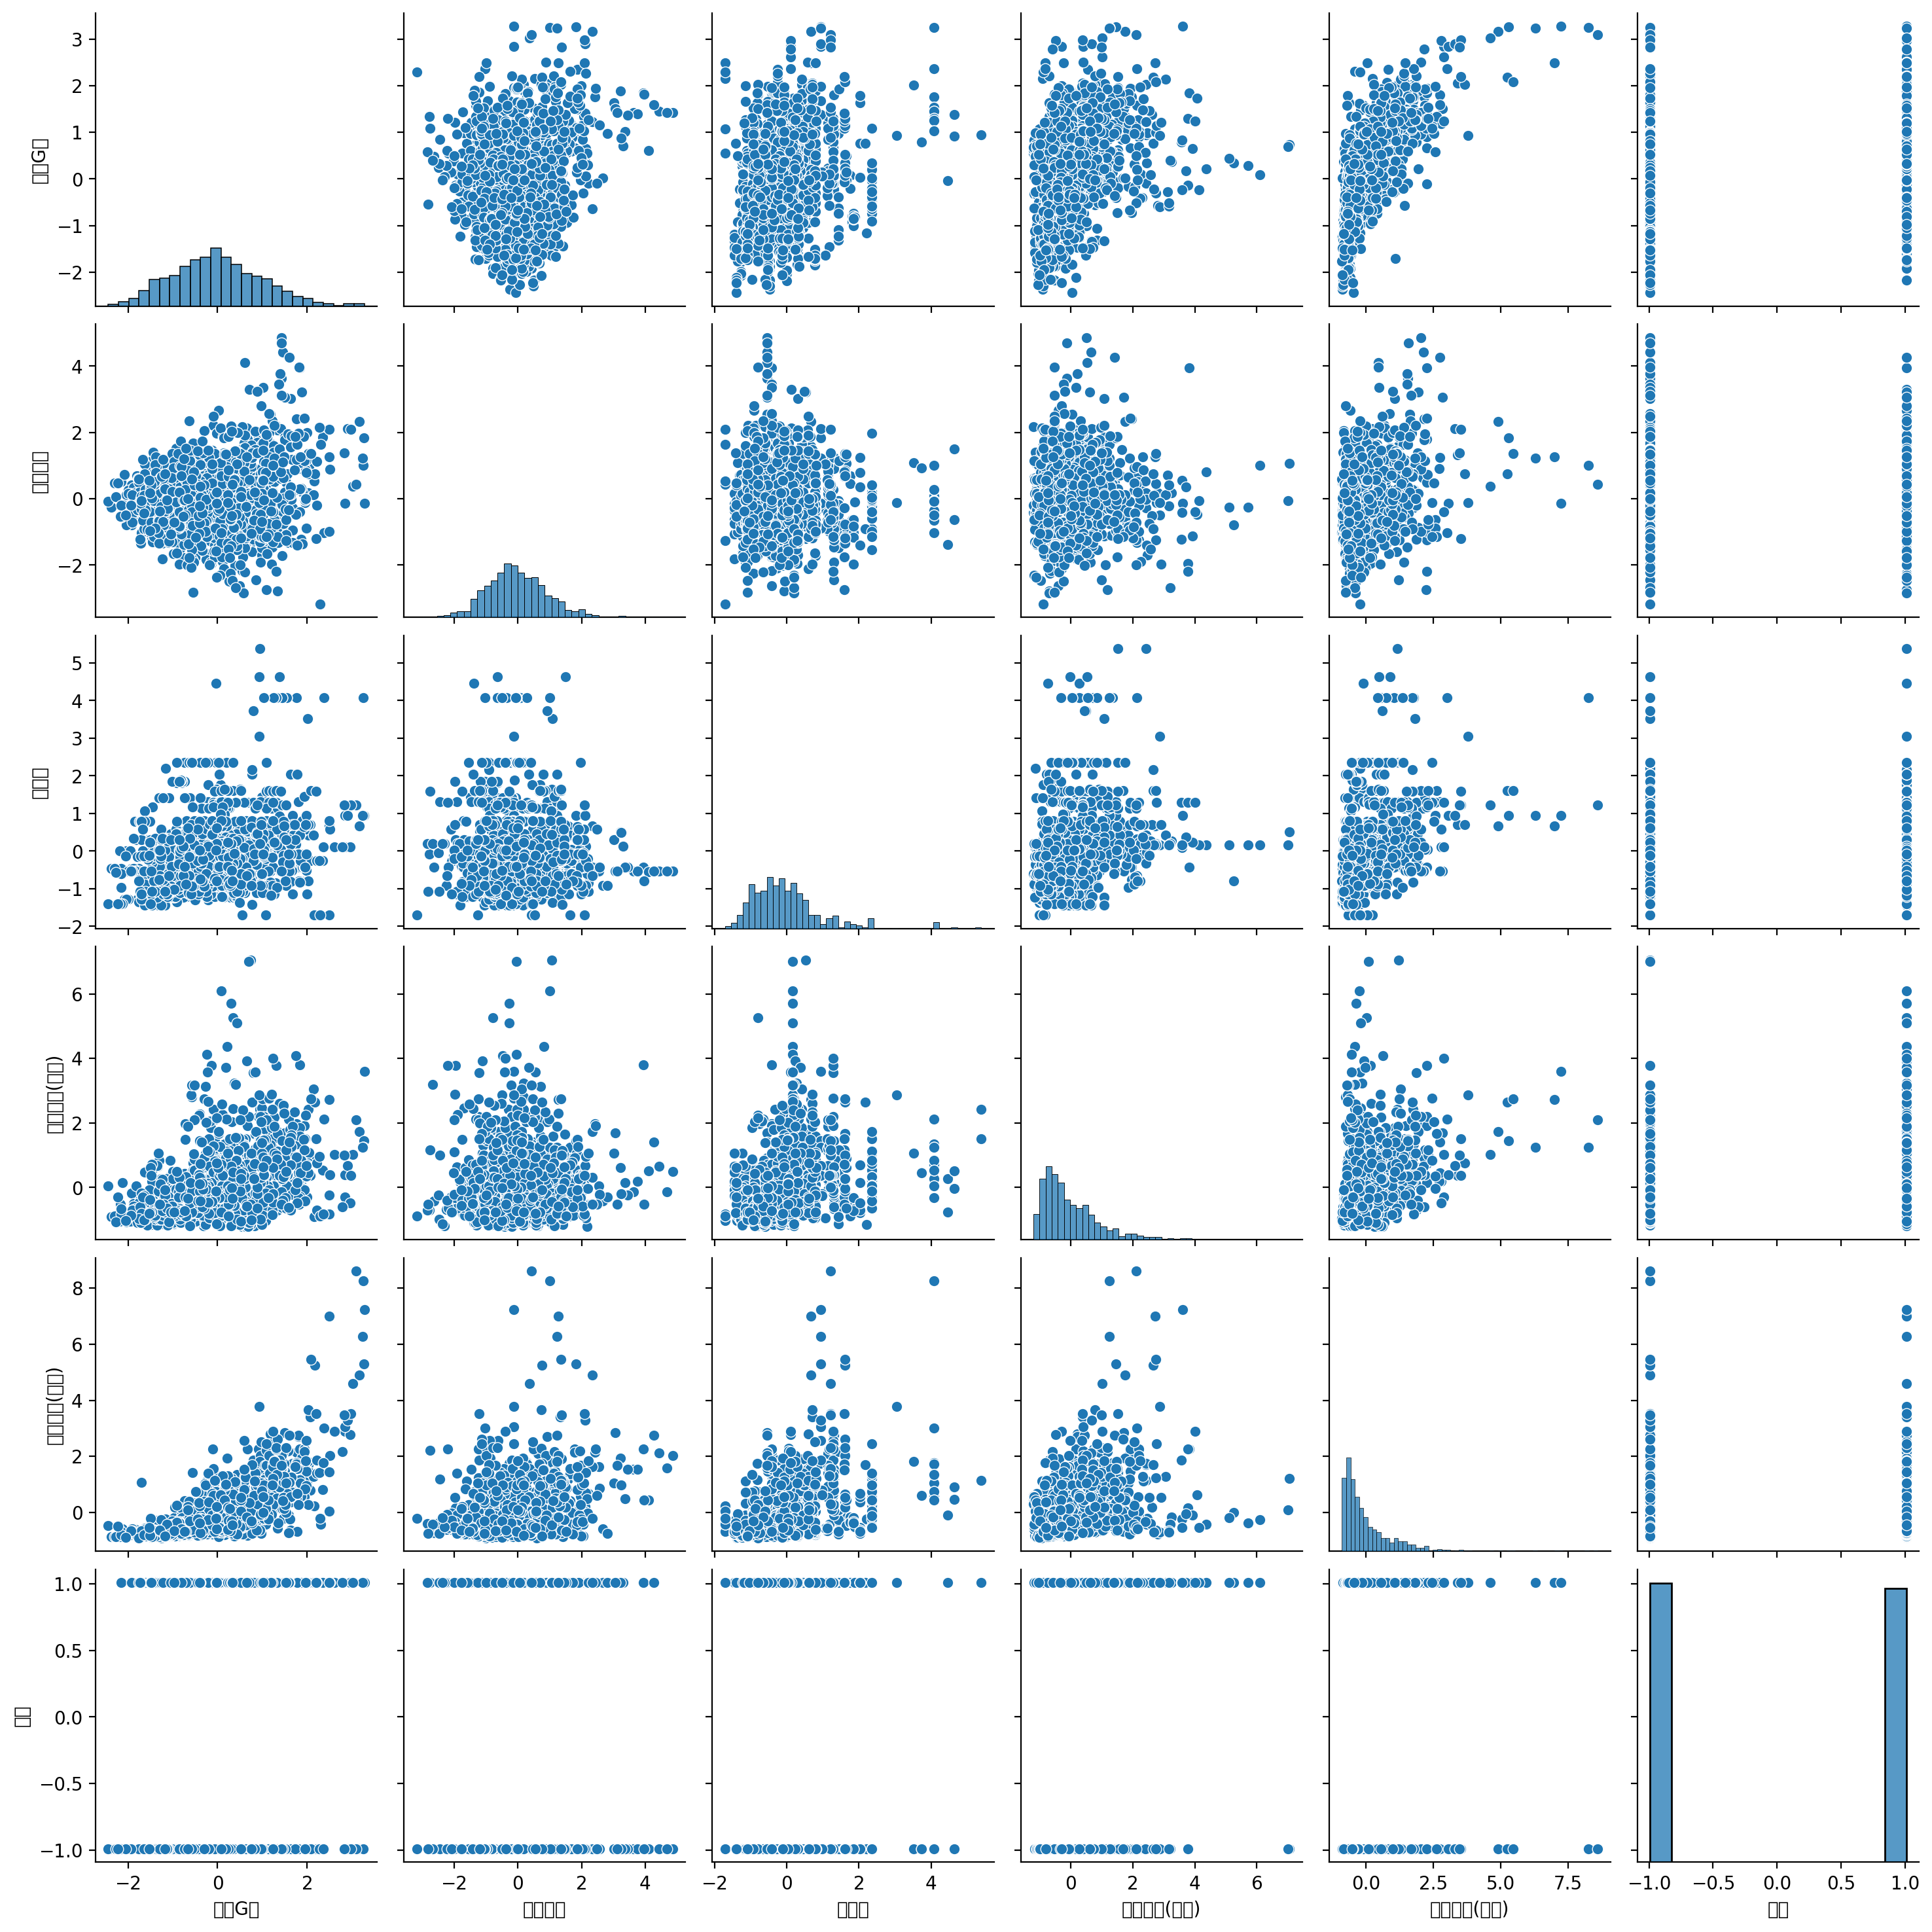

In [21]:
sns.pairplot(merge_data_std_df)
plt.show()

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [29]:
merge_data_df.dropna(inplace=True)

In [30]:
#merge_data_dfを使って並び人数(スロ)を目的変数にして重回帰分析を行う
# 目的変数(Y)
Y = np.array(merge_data_df['並び人数(スロ)'])
 
# 説明変数(X)
col_name = ['平均G数','平均差枚','総台数','一般並び(スロ)','土日']
X = np.array(merge_data_df[col_name])

In [31]:
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [32]:
# モデル構築　
model = LinearRegression()
 
# 学習
model.fit(X_train, Y_train)

LinearRegression()

In [33]:
# 回帰係数
coef = pd.DataFrame({"col_name":np.array(col_name),"coefficient":model.coef_}).sort_values(by='coefficient')
 
# 結果
print("【回帰係数】", coef)
print("【切片】:", model.intercept_)
print("【決定係数(訓練)】:", model.score(X_train, Y_train))
print("【決定係数(テスト)】:", model.score(X_test, Y_test))

【回帰係数】    col_name  coefficient
4        土日   -35.995608
0      平均G数     0.077136
1      平均差枚     0.112600
2       総台数     0.204173
3  一般並び(スロ)     0.529811
【切片】: -204.70031215236222
【決定係数(訓練)】: 0.5963915562535692
【決定係数(テスト)】: 0.6159601241312187


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(merge_data_df))
df_std = scaler.transform(np.array(merge_data_df))

In [47]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression


# 目的変数(Y)
Y = np.array(merge_data_df['並び人数(スロ)'])
 
# 説明変数(X)
col_name = ['平均G数','平均差枚','総台数','一般並び(スロ)','土日']
X = np.array(merge_data_df[col_name])

# 説明変数Xと目的変数を、学習データ（8割）とテストデータ（2割）に分割（random_stateは0）
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
# 分割の確認
print('分割の確認：',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# 回帰分析実行
# インスタンスの作成
model = LinearRegression()
# モデルの作成
model.fit(X_train, Y_train)

# 回帰直線の確認
# 切片
print('切片の値 = ', model.intercept_)
# 係数
print('係数の値 = ', model.coef_)

# 学習データからの予測値
pred_train = model.predict(X_train)
# テストデータからの予測値
pred_test = model.predict(X_test)

# 結果確認
print('学習データの平均二乗誤差： ', np.mean((Y_train - pred_train) ** 2))
print('テストデータの平均二乗誤差： ', np.mean((Y_test - pred_test) ** 2))
print('決定係数：',model.score(X_test,Y_test))

# モデルを使った計算
X0=4000 # 平均G数
X1=300 # 平均差枚
X2=100 # 総台数
X3=30 # 一般並び(スロ)
X4=0 # 土日
'平均G数','平均差枚','総台数','一般並び(スロ)','土日'
price=model.intercept_+model.coef_[0]*X0+model.coef_[1]*X1+model.coef_[2]*X2+model.coef_[3]*X3+model.coef_[4]*X4
print('平均G数',X0,'Gで','平均差枚',X1,'枚','総台数',X2,'台','一般並び(スロ)',X3,'人で','土日が',X4,'なら平均並び人数が約',round(price,1),'人である。')




分割の確認： (1142, 5) (286, 5) (1142,) (286,)
切片の値 =  -205.27038306664306
係数の値 =  [  0.0754912    0.11114557   0.22212756   0.52483983 -35.11534934]
学習データの平均二乗誤差：  9566.03277891333
テストデータの平均二乗誤差：  10462.398693998577
決定係数： 0.6046838152576876
平均G数 4000 Gで 平均差枚 300 枚 総台数 100 台 一般並び(スロ) 30 人で 土日が 0 なら平均並び人数が約 168.0 人である。
